In [3]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import random
import matplotlib.pyplot as plt

### 이미지 너비와 높이 설정

In [5]:
img_width,img_height=28,28

In [6]:
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

### train set의 모양은 28x28x1 train data의 개수=60000

In [9]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

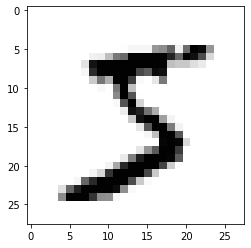

In [8]:
plt.imshow(X_train[0],cmap='Greys',interpolation='nearest')

In [11]:
input_shape=(img_width,img_height,1)

In [14]:
X_train=X_train.reshape(X_train.shape[0],img_width,img_height,1)
X_test=X_test.reshape(X_test.shape[0],img_width,img_height,1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
X_train.dtype ##	Unsinged int형태 (0 to 255)

dtype('uint8')

### Scale 조정 -> 모든 픽셀이 0~1의 값을 갖도록

In [22]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [23]:
print('X_train shape: ',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

X_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


### y의 class가 몇개인지 확인

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
num_classes=10

## 분류 목적에 맞게 y의 형태를 변환
### y의 predict 값을 찾는 과정이 마지막에 y가 어떤 클래스일 확률값을 계산하여 가장 큰 확률을 갖는 클래스를 선택하기 때문

In [19]:
before_y_train=y_train[0]

In [20]:
y_train=keras.utils.to_categorical(y_train,num_classes)

In [21]:
y_test=keras.utils.to_categorical(y_test,num_classes)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Before After 비교

In [24]:
print("before : ",before_y_train)
print("after : ",y_train[0])

before :  5
after :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## CNN 모델 생성

In [38]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu',
                input_shape=input_shape)) ##filter는 5x5x1 strides간격은 1
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1))) ##pool_size는 2x2
model.add(Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) ##overfitting방지
model.add(Flatten())##데이터를 펼쳐줌 -> 다음 layer부터는 fully-connected-layer
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)             

## 성능 확인

In [41]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist=model.fit(X_train,y_train,batch_size=128,epochs=3,verbose=1,validation_data=(X_test,y_test))

score=model.evaluate(X_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 307s 5ms/step - loss: 0.1327 - accuracy: 0.9592 - val_loss: 0.0403 - val_accuracy: 0.9867
Epoch 2/3
60000/60000 [==============================] - 306s 5ms/step - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.0350 - val_accuracy: 0.9883
Epoch 3/3
60000/60000 [==============================] - 308s 5ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0256 - val_accuracy: 0.9914
Test loss: 0.0255727359845303
Test accuracy 0.9914000034332275


## Predict 값 확인

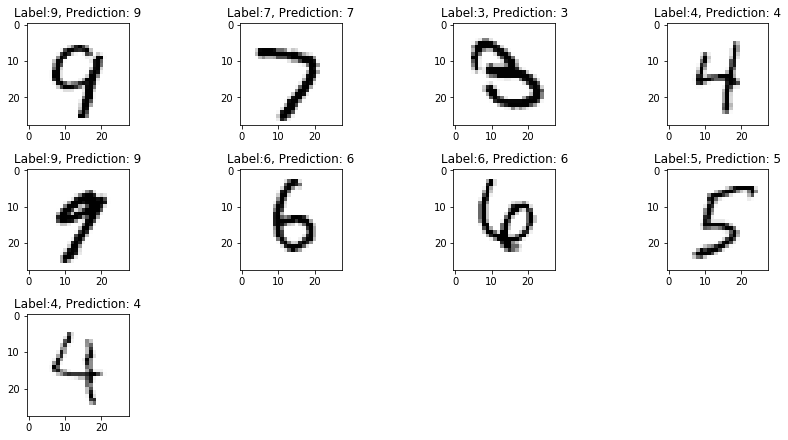

In [46]:
import random
import matplotlib.pyplot as plt

pred_results=model.predict(X_test)
pred_labels=np.argmax(pred_results,axis=1)

test_labels=np.argmax(y_test,axis=1)

count=0

plt.figure(figsize=(12,8))
for n in range(16,25):
    count+=1
    plt.subplot(4,4,count)
    plt.imshow(X_test[n].reshape(28,28),cmap='Greys',interpolation='nearest')
    tmp="Label:" + str(test_labels[n]) + ", Prediction: " + str(pred_labels[n])
    plt.title(tmp)
    
plt.tight_layout()
plt.show()